<a href="https://colab.research.google.com/github/Hazhar-Rahmani/Business-Analytics2/blob/main/W025_C01_Custom_Assignment_Hazhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6369 - loss: 0.6541 - val_accuracy: 0.6690 - val_loss: 0.6199
Epoch 2/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6654 - loss: 0.6207 - val_accuracy: 0.6621 - val_loss: 0.6284
Epoch 3/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6562 - loss: 0.6272 - val_accuracy: 0.6621 - val_loss: 0.6171
Epoch 4/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6540 - loss: 0.6254 - val_accuracy: 0.6621 - val_loss: 0.6166
Epoch 5/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6570 - loss: 0.6253 - val_accuracy: 0.6621 - val_loss: 0.6165
Epoch 6/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6580 - loss: 0.6209 - val_accuracy: 0.6621 - val_loss: 0.6164
Epoch 7/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6654 - loss: 0.6164 - val_accuracy: 0.6621 - val_loss: 0.6221
Epoch 8/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6562 - loss: 0.6203 - val_accuracy: 0.

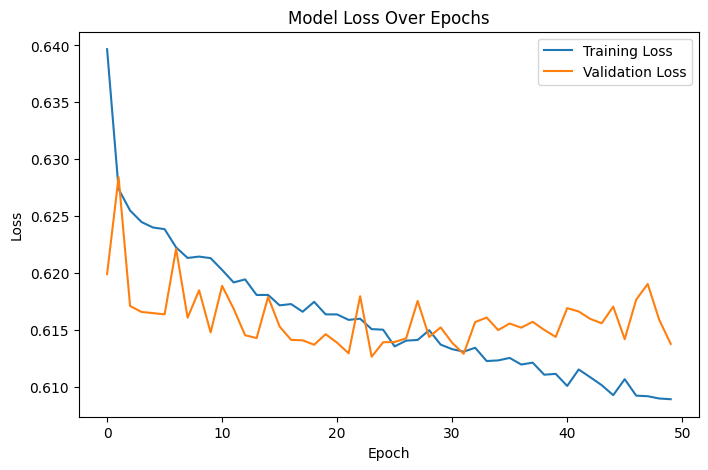

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

data = pd.read_csv('https://raw.githubusercontent.com/Hazhar-Rahmani/Business-Analytics2/refs/heads/main/AAPL(80-24)%20Final.csv')

data['Date'] = pd.to_datetime(data['Date'])
data = data.dropna()
data['Volume'] = data['Vol.'].apply(lambda x: float(str(x)[:-1]))
# Data preprocessing: Calculate technical indicators
data['MA10'] = data['Open'].rolling(window=10).mean()
data['Return'] = data['Open'].pct_change()
data.dropna(inplace=True)

# Create target: 1 if next day's close is higher, 0 otherwise
data['Target'] = (data['Open'].shift(-1) > data['Open']).astype(int)
data.dropna(inplace=True)

data['day_of_year'] = data['Date'].dt.dayofyear
data['sin_day'] = np.sin(2 * np.pi * data['day_of_year'] / 365)
data['cos_day'] = np.cos(2 * np.pi * data['day_of_year'] / 365)

# Convert 'Date' to datetime format and sort by date
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data.sort_values('Date', inplace=True)
else:
    print("No 'Date' column found. Exiting.")

# Define features and target variable
features = ['Open', 'High', 'Low', 'Volume', 'MA10', 'Return', 'sin_day', 'cos_day']
X = data[features]
y = data['Target']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Visualize training and validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


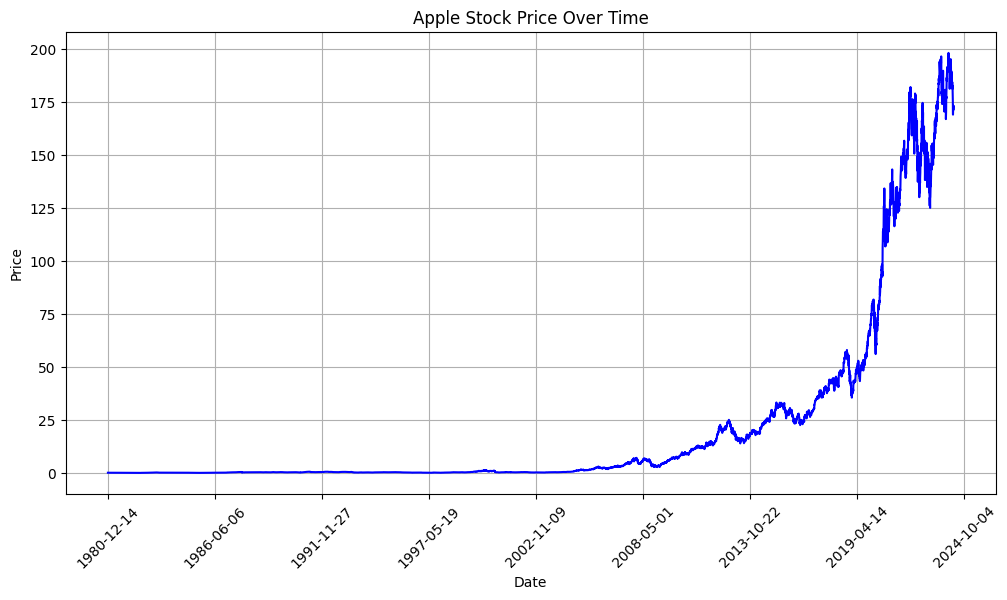

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], color='blue')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the frequency of x-axis tick marks
plt.grid(True)
plt.show()

##Can a neural network trained with error-based learning effectively predict next-day stock price movements?

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy and other metrics
nn_accuracy = accuracy_score(y_test, y_pred)
print("\nNeural Network Test Accuracy: {:.2f}%".format(nn_accuracy * 100))
print("\nClassification Report for Neural Network:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Neural Network Test Accuracy: 66.12%

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.66      0.98      0.79      1438
           1       0.54      0.03      0.07       743

    accuracy                           0.66      2181
   macro avg       0.60      0.51      0.43      2181
weighted avg       0.62      0.66      0.55      2181

Confusion Matrix:
 [[1416   22]
 [ 717   26]]


The matrix shows that the model correctly identified 1416 negatives and only 26 positives, while it incorrectly labeled 22 negatives as positives (false positives) and missed 717 actual positives (false negatives).

This indicates that the model is very conservative in predicting positives, leading to a high rate of missed positive cases despite a low false positive count.

This experiment shows that predicting stock prices is a challenging task and cannot be done accurately with a simple artificial neural network.






##How do different technical indicators (e.g., moving averages, daily returns) correlate with each other and with price changes?




Correlation Matrix:
            Open      High       Low    Volume      MA10    Return    Target
Open    1.000000  0.999948  0.999939 -0.268429  0.999487 -0.003822  0.121178
High    0.999948  1.000000  0.999924 -0.268110  0.999548 -0.005373  0.121529
Low     0.999939  0.999924  1.000000 -0.268887  0.999554 -0.005625  0.120911
Volume -0.268429 -0.268110 -0.268887  1.000000 -0.268686 -0.018724  0.049185
MA10    0.999487  0.999548  0.999554 -0.268686  1.000000 -0.008284  0.121537
Return -0.003822 -0.005373 -0.005625 -0.018724 -0.008284  1.000000 -0.058494
Target  0.121178  0.121529  0.120911  0.049185  0.121537 -0.058494  1.000000


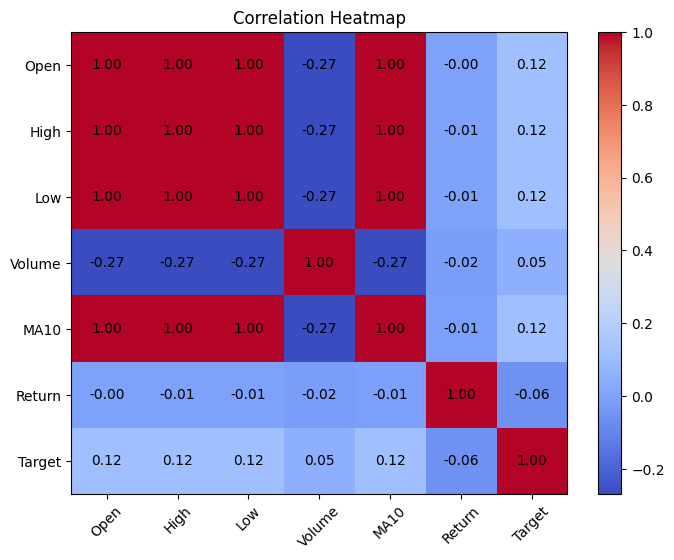

In [5]:
numeric_cols = ['Open', 'High', 'Low', 'Volume']

correlation_cols = numeric_cols.copy()
if 'MA10' in data.columns:
    correlation_cols.append('MA10')
if 'Return' in data.columns:
    correlation_cols.append('Return')
if 'Target' in data.columns:
    correlation_cols.append('Target')
# Compute the correlation matrix
corr_matrix = data[correlation_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Plot a heatmap of the correlation matrix using matplotlib
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_cols)), correlation_cols, rotation=45)
plt.yticks(range(len(correlation_cols)), correlation_cols)
plt.title('Correlation Heatmap')

# Add correlation coefficient values on the heatmap
for i in range(len(correlation_cols)):
    for j in range(len(correlation_cols)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")
plt.show()

There is no obvious correlation between the price and the target variable.

##Are there any observable trends or seasonal patterns in stock prices and trading volumes over time?



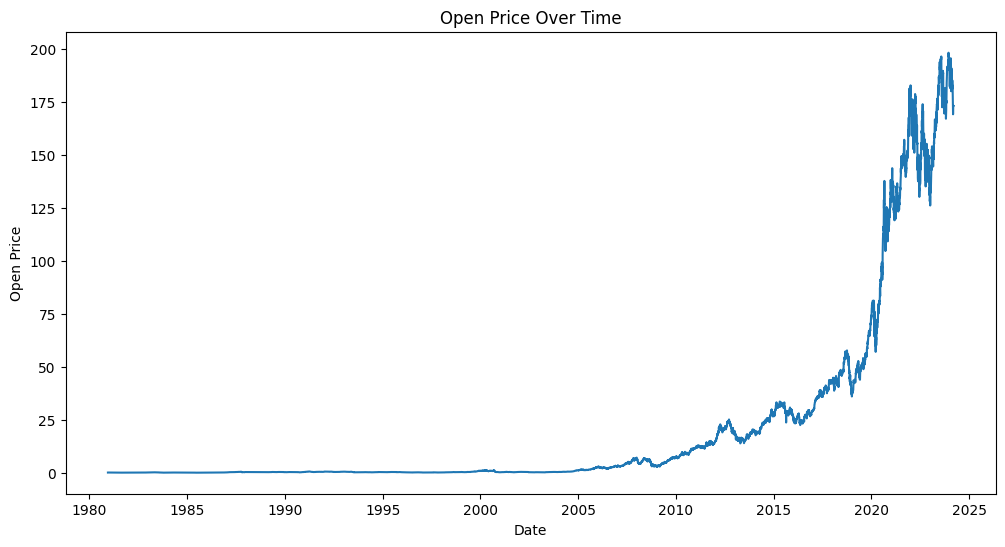

<ipython-input-6-f631ab6f9843>:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(data['Volume'].resample('M').mean())
<ipython-input-6-f631ab6f9843>:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(data['Volume'].resample('Y').mean())


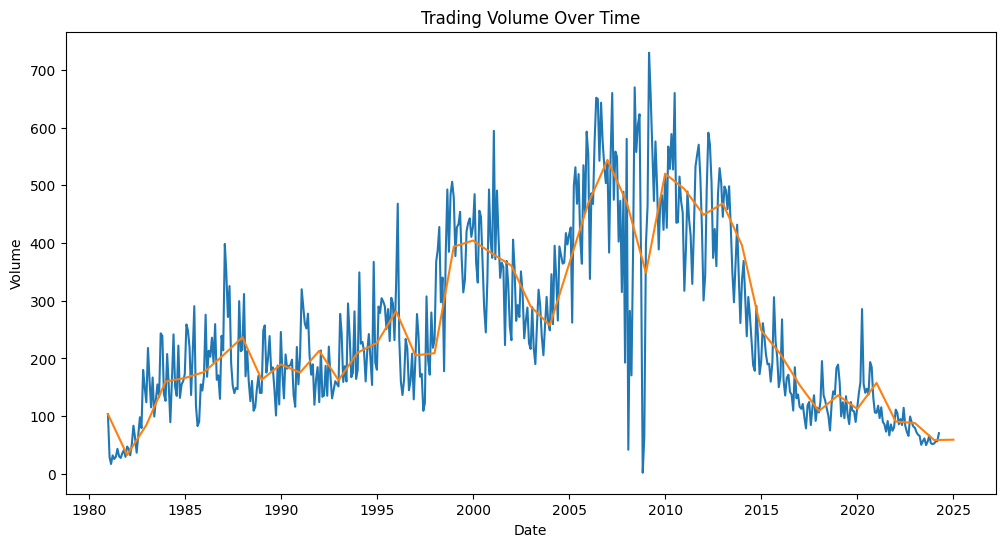

<ipython-input-6-f631ab6f9843>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data[['Open']].resample('M').mean()


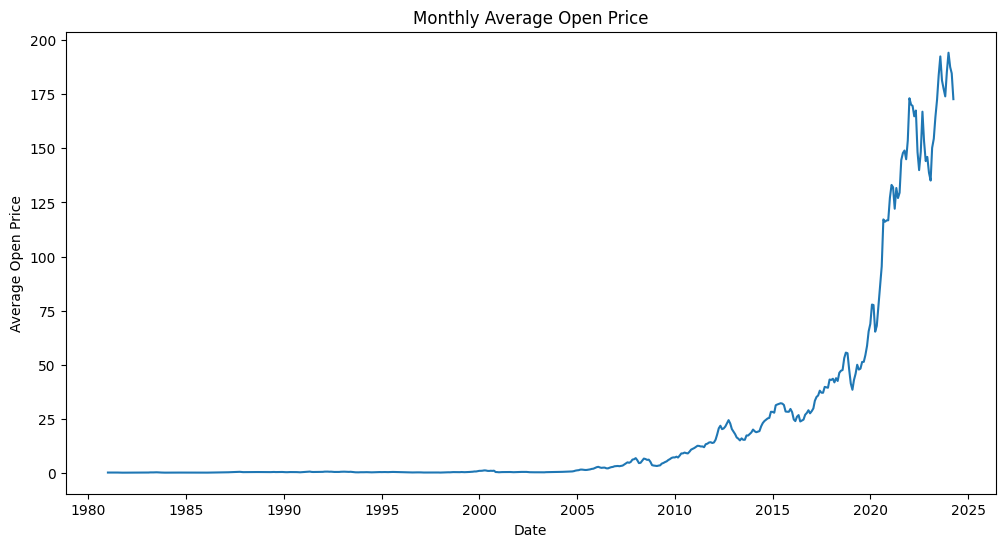

In [6]:
# Assume the dataset contains a 'Date' column
if ('Date' in data.columns) or data.index.name == 'Date':
    if data.index.name != 'Date':
      # Convert 'Date' to datetime format and sort the data
      data['Date'] = pd.to_datetime(data['Date'])
      data.sort_values('Date', inplace=True)
      data.set_index('Date', inplace=True)

    # Plot the Close price over time
    plt.figure(figsize=(12,6))
    plt.plot(data['Open'])
    plt.title('Open Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Open Price')
    plt.show()

    # Plot the trading Volume over time
    plt.figure(figsize=(12,6))
    plt.plot(data['Volume'].resample('M').mean())
    plt.plot(data['Volume'].resample('Y').mean())
    plt.title('Trading Volume Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.show()

    # Resample the data to monthly averages to examine seasonal trends
    monthly_data = data[['Open']].resample('M').mean()
    plt.figure(figsize=(12,6))
    plt.plot(monthly_data['Open'])
    plt.title('Monthly Average Open Price')
    plt.xlabel('Date')
    plt.ylabel('Average Open Price')
    plt.show()
else:
    print("No 'Date' column found. Skipping time series analysis.")


The figures show the trends in the price. You can see a price increase after 2015, and the rate of price increase is not consistent over time.